In [12]:
import pandas as pd 
import matplotlib

%matplotlib inline


In [13]:
def parser(x):
    return pd.datetime.strptime(x,'%Y-%m-%d')
 
train_df = pd.read_csv('train.csv', header=0,usecols=['date','store','item','sales'])
train_df = train_df[train_df['store']==1]
train_df = train_df[train_df['item']==1]


train_df.head()

df=train_df.copy()

In [14]:
df['date'].min(), df['date'].max()
df['date'] = pd.to_datetime(df['date'])

In [15]:
df = df.groupby('date')['sales'].sum().reset_index()
df.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [16]:
df=df.set_index('date')
y=df

In [17]:
y = df['sales'].resample('MS').mean()

In [18]:
y

date
2013-01-01    10.580645
2013-02-01    11.500000
2013-03-01    15.387097
2013-04-01    17.400000
2013-05-01    17.129032
2013-06-01    20.900000
2013-07-01    21.322581
2013-08-01    19.161290
2013-09-01    17.300000
2013-10-01    15.612903
2013-11-01    19.066667
2013-12-01    12.516129
2014-01-01    14.032258
2014-02-01    14.464286
2014-03-01    17.709677
2014-04-01    19.100000
2014-05-01    21.000000
2014-06-01    23.666667
2014-07-01    24.064516
2014-08-01    21.645161
2014-09-01    18.866667
2014-10-01    17.903226
2014-11-01    20.633333
2014-12-01    13.193548
2015-01-01    13.806452
2015-02-01    14.250000
2015-03-01    17.806452
2015-04-01    21.733333
2015-05-01    22.935484
2015-06-01    24.933333
2015-07-01    27.161290
2015-08-01    22.774194
2015-09-01    22.600000
2015-10-01    20.870968
2015-11-01    22.800000
2015-12-01    14.838710
2016-01-01    14.483871
2016-02-01    15.517241
2016-03-01    19.000000
2016-04-01    23.133333
2016-05-01    25.225806
2016-06-01 

In [19]:
train=y[0:-12]
valid=y[-12:]

In [20]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

model = auto_arima(train, trace=True, start_p=3, start_q=3, start_P=1, start_Q=5,
                     max_p=7, max_q=7, max_P=7, max_order=20,max_Q=6,D=1,d=1, m=12,seasonal=True,
                     stepwise=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=12)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set


Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 1, 5, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=114.525, BIC=117.636, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=108.746, BIC=114.968, Fit time=0.157 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=107.289, BIC=111.955, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=108.631, BIC=114.852, Fit time=0.052 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=108.637, BIC=114.858, Fit time=0.091 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=107.426, BIC=115.203, Fit

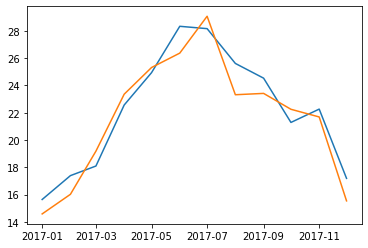

In [21]:
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -50.644
Date:                            Sat, 24 Aug 2019   AIC                            107.289
Time:                                    12:52:03   BIC                            111.955
Sample:                                         0   HQIC                           108.899
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1200      0.196     -0.611      0.541      -0.505       0.265
ar.L1         -0.4947      0.183     -2.706      0.007      -0.853      -0.136
sigma2         1.0492      0.270      3.890      0.000       0.521       1.578
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 2.72
Prob(Q):                               nan   Prob(JB):                         0.26
Heteroskedasticity (H):               0.98   Skew:                             0.68
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error
expected =  valid
predictions = forecast

mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 1.179755
MSE: 1.676644
RMSE: 1.294853
